<a href="https://colab.research.google.com/github/araldi/HS22_Big-Data-analysis-in-Biomedical-Research/blob/main/Week_08/13_AgglomerativeClustering_DBSCAN_and_Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [ ]:
mall = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")

mall.drop(columns =['CustomerID'], inplace = True)

conditions = [mall['Gender'] == 'Male', mall['Gender'] == 'Female']
choices = [1, 0]
mall['Gender'] = np.select(conditions, choices)



In [ ]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
iris_df = sns.load_dataset('iris')
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_ML = iris_df[numeric_cols]


In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
food = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/food/food.csv')
food_ML = food.drop(columns = ['Category', 'Description', 'Nutrient Data Bank Number'])
mcg = ['Data.Alpha Carotene',
'Data.Beta Carotene',
'Data.Beta Cryptoxanthin',
'Data.Lutein and Zeaxanthin',
'Data.Lycopene',
'Data.Retinol',
'Data.Selenium',
'Data.Vitamins.Vitamin A - RAE',
'Data.Vitamins.Vitamin B12',
'Data.Vitamins.Vitamin K']



mg = ['Data.Cholesterol',
'Data.Choline',
'Data.Niacin',
'Data.Riboflavin',
'Data.Thiamin',
'Data.Major Minerals.Calcium',
'Data.Major Minerals.Copper',
'Data.Major Minerals.Iron',
'Data.Major Minerals.Magnesium',
'Data.Major Minerals.Phosphorus',
'Data.Major Minerals.Potassium',
'Data.Major Minerals.Sodium',
'Data.Major Minerals.Zinc',
'Data.Vitamins.Vitamin B6',
'Data.Vitamins.Vitamin C',
'Data.Vitamins.Vitamin E']

for m in mg:
  food_ML.loc[:, m] = food_ML.loc[:, m] / 1000

for m in mcg:  
  print(m)
  food_ML.loc[:, m] = food_ML.loc[:, m] / 1000000

#food_ML = food_ML.drop(columns = ['Category', 'Description'])


Data.Alpha Carotene
Data.Beta Carotene
Data.Beta Cryptoxanthin
Data.Lutein and Zeaxanthin
Data.Lycopene
Data.Retinol
Data.Selenium
Data.Vitamins.Vitamin A - RAE
Data.Vitamins.Vitamin B12
Data.Vitamins.Vitamin K


In [ ]:
food_ML

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0.000000,0.000007,0.000000,6.89,0.014,0.0160,0.0,0.000000,0.000000,0.000177,...,0.014,0.051,0.017,0.00017,0.000061,5.000000e-08,0.000011,0.0050,0.00008,3.000000e-07
1,0.000000,0.000004,0.000000,4.87,0.008,0.0179,0.0,0.000000,0.000000,0.000110,...,0.103,0.157,0.039,0.00042,0.000059,5.600000e-07,0.000060,0.0001,0.00003,2.000000e-07
2,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,...,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
3,0.000000,0.000007,0.000000,4.46,0.014,0.0160,0.0,0.000000,0.000000,0.000043,...,0.086,0.253,0.003,0.00038,0.000029,3.600000e-07,0.000034,0.0009,0.00008,3.000000e-07
4,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,...,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,0.000103,0.000464,0.000000,5.48,0.000,0.0074,1.6,0.000142,0.002597,0.000637,...,0.030,0.278,0.006,0.00021,0.000043,0.000000e+00,0.000104,0.0182,0.00060,8.800000e-06
7079,0.000001,0.000011,0.000000,4.81,0.000,0.0194,1.4,0.000018,0.000000,0.003678,...,0.096,0.364,0.006,0.00058,0.000001,4.000000e-08,0.000123,0.0063,0.00003,4.000000e-07
7080,0.000368,0.000994,0.000000,11.60,0.000,0.0146,2.2,0.000225,0.000458,0.000773,...,0.046,0.312,0.019,0.00028,0.000098,0.000000e+00,0.000177,0.0162,0.00024,8.900000e-06
7081,0.000000,0.000194,0.000004,17.14,0.013,0.0200,0.6,0.000112,0.007237,0.000917,...,0.033,0.190,0.845,0.00021,0.000021,4.000000e-08,0.000104,0.0025,0.00190,5.080000e-05


# Hierarchical Clustering


The most common approach (agglomerative clustering) works as follows:

* Mark each point in the dataset as a cluster.
* Pick the two closest cluster centers without a parent and combine them into a new cluster.
* The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
* Repeat steps 2 and 3 till there's just one cluster left, or the number of clusters you decided to have.




In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

Example of agglomerative clustering on the iris dataset.

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

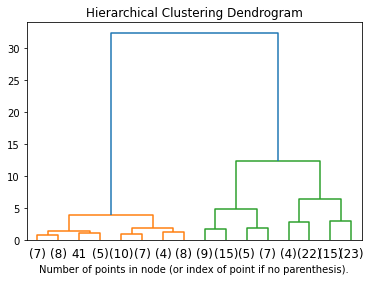

In [ ]:
model = AgglomerativeClustering(distance_threshold=30, n_clusters=None)

model = model.fit(iris_ML)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

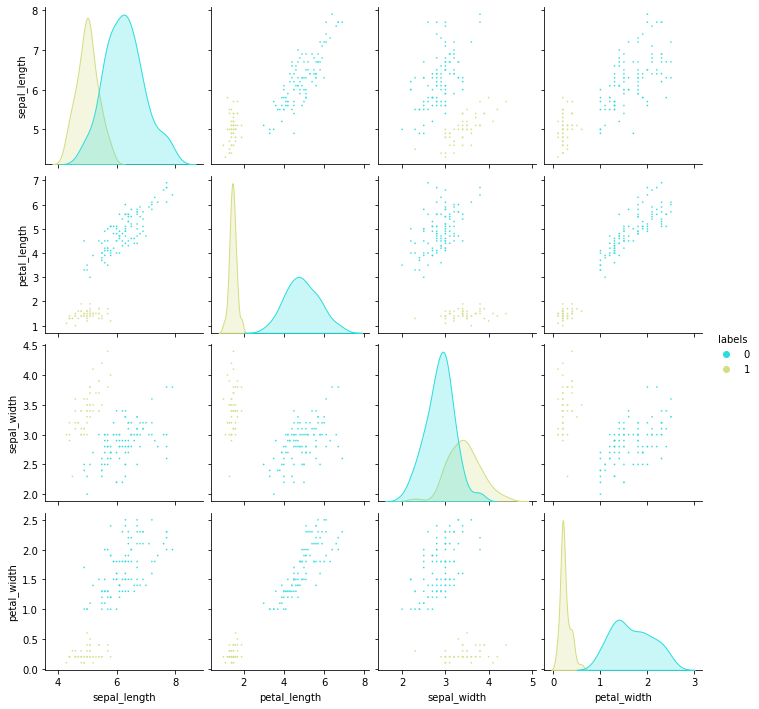

In [ ]:
# visualize the hirarchical clusters in dataset

iris_df['labels'] = model.labels_
iris_df['labels'].value_counts()

data = iris_df[['sepal_length', 'petal_length', 'sepal_width', 'petal_width','labels']]
sns.pairplot(data, hue='labels', palette="rainbow", plot_kws={"s": 3})
#

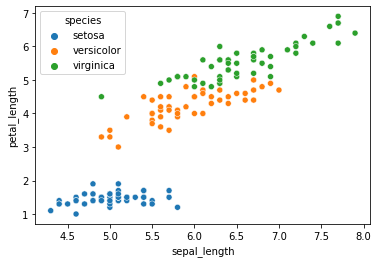

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

Let's force three clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


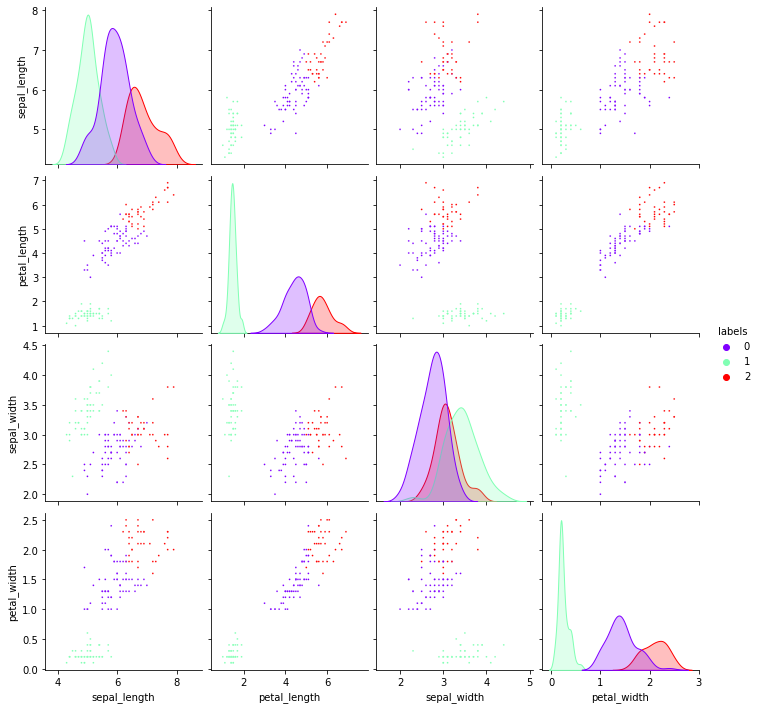

In [ ]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=3)

model = model.fit(iris_ML)

iris_ML['labels'] = model.labels_
iris_ML['labels'].value_counts()

data = iris_ML[['sepal_length', 'petal_length', 'sepal_width', 'petal_width','labels']]
sns.pairplot(data, hue='labels', palette="rainbow", plot_kws={"s": 3})

### Exercise




Do hierarchical clustering on the food and mall dataset, modifying appropriately the distance threshold and n_clusters parameters. Does agglomerative clustering perform better than K-means?

# DBSCAN
Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

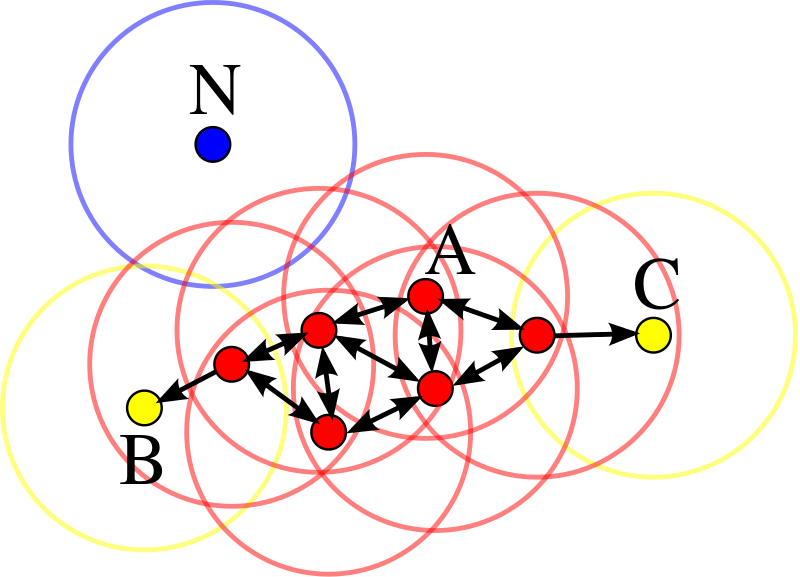

**Epsilon** is the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

**min_samples** is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

Noisy samples are given the label -1

In [ ]:
from sklearn.cluster import DBSCAN



### Iris

In [ ]:
iris_ML = iris_ML.drop(columns = ['labels'])

In [ ]:
model = DBSCAN(eps=0.5, min_samples=5)


model.fit(iris_ML)

DBSCAN()

In [ ]:
np.unique(model.labels_)

array([-1,  0,  1])

In [ ]:
iris_ML['labels'] = model.labels_
iris_ML['labels'].value_counts()

 1    84
 0    49
-1    17
Name: labels, dtype: int64

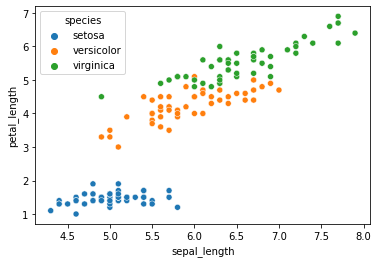

In [ ]:
# official classification
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

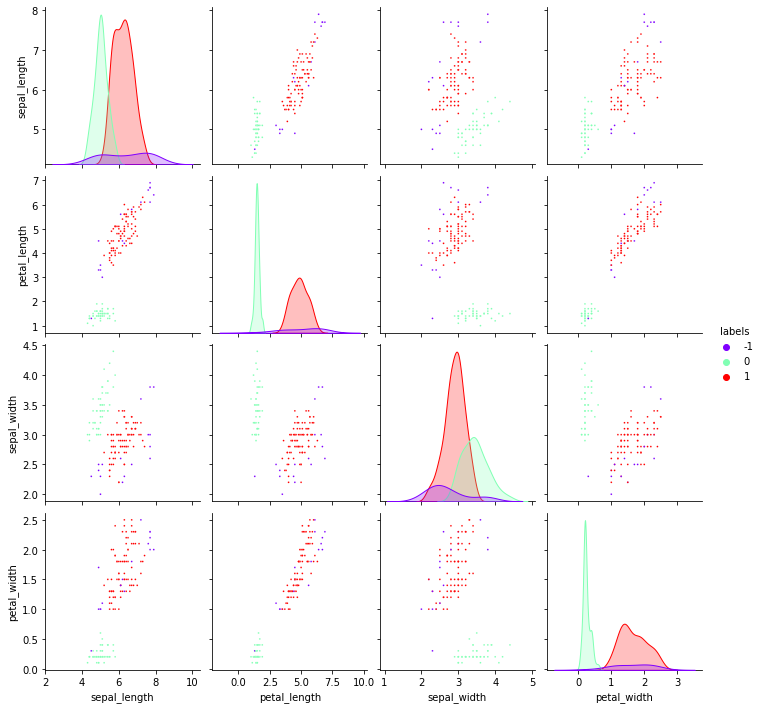

In [ ]:
# visualize the DBSCAN clusters in dataset

data = iris_ML[['sepal_length', 'petal_length', 'sepal_width', 'petal_width','labels']]
sns.pairplot(data, hue='labels', palette="rainbow", plot_kws={"s": 3})

### Exercise

Compare the results of agglomerative clustering, DBSCAN and K-means for the mall dataset. Which is the clustering algorithm that sorts the data in the most accurate way?

### Food

Use DBSCAN to cluster food categories.

In [ ]:
food_ML

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0.000000,0.000007,0.000000,6.89,0.014,0.0160,0.0,0.000000,0.000000,0.000177,...,0.014,0.051,0.017,0.00017,0.000061,5.000000e-08,0.000011,0.0050,0.00008,3.000000e-07
1,0.000000,0.000004,0.000000,4.87,0.008,0.0179,0.0,0.000000,0.000000,0.000110,...,0.103,0.157,0.039,0.00042,0.000059,5.600000e-07,0.000060,0.0001,0.00003,2.000000e-07
2,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,...,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
3,0.000000,0.000007,0.000000,4.46,0.014,0.0160,0.0,0.000000,0.000000,0.000043,...,0.086,0.253,0.003,0.00038,0.000029,3.600000e-07,0.000034,0.0009,0.00008,3.000000e-07
4,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,...,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,0.000103,0.000464,0.000000,5.48,0.000,0.0074,1.6,0.000142,0.002597,0.000637,...,0.030,0.278,0.006,0.00021,0.000043,0.000000e+00,0.000104,0.0182,0.00060,8.800000e-06
7079,0.000001,0.000011,0.000000,4.81,0.000,0.0194,1.4,0.000018,0.000000,0.003678,...,0.096,0.364,0.006,0.00058,0.000001,4.000000e-08,0.000123,0.0063,0.00003,4.000000e-07
7080,0.000368,0.000994,0.000000,11.60,0.000,0.0146,2.2,0.000225,0.000458,0.000773,...,0.046,0.312,0.019,0.00028,0.000098,0.000000e+00,0.000177,0.0162,0.00024,8.900000e-06
7081,0.000000,0.000194,0.000004,17.14,0.013,0.0200,0.6,0.000112,0.007237,0.000917,...,0.033,0.190,0.845,0.00021,0.000021,4.000000e-08,0.000104,0.0025,0.00190,5.080000e-05


In [ ]:
model = DBSCAN(eps=10, min_samples=20)


model.fit(food_ML)

DBSCAN(eps=10, min_samples=20)

In [ ]:
np.unique(model.labels_)

array([-1,  0,  1,  2,  3])

In [ ]:
food['labels'] = model.labels_
food['labels'].value_counts()

 0    6033
-1     569
 2     426
 1      34
 3      21
Name: labels, dtype: int64

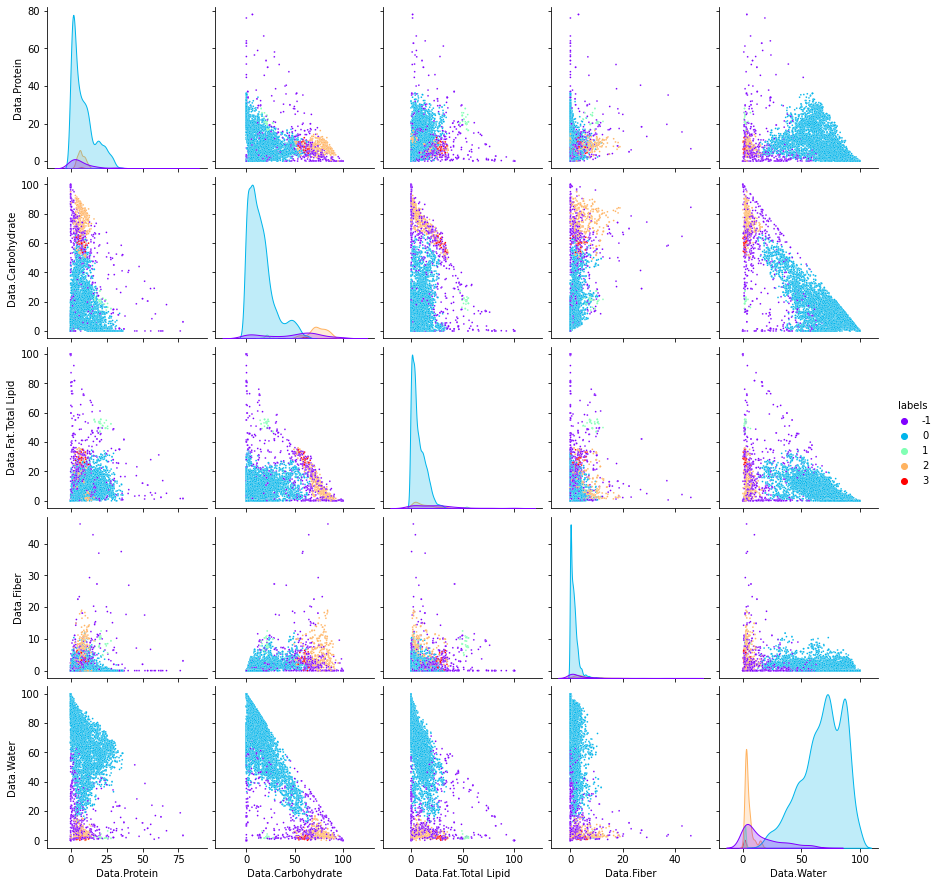

In [ ]:
# visualize the labels in dataset

data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','labels']]
sns.pairplot(data, hue='labels', palette="rainbow", plot_kws={"s": 3})

In [ ]:
# check which food belongs to each cluster

for f in food['labels'].unique():
  
  d = food[food['labels'] == f]
  print("label:", f, ", category:", d['Category'].value_counts())

label: 0 , category: Infant formula                                173
Rice                                          143
Bread                                         118
Potato                                        105
Frankfurter or hot dog sandwich                95
                                             ... 
Ham or pork and potatoes with gravy             1
Breakfast pastry                                1
Ham or pork and potatoes with cheese sauce      1
Cheese pastry puffs                             1
Vegetables as ingredient in curry               1
Name: Category, Length: 1961, dtype: int64
label: -1 , category: Cookie                                  27
Nutritional powder mix                  11
Fudge                                   10
Cake                                    10
Crackers                                10
                                        ..
Meat substitute                          1
Cheese quiche                            1
Kishke              

### Exercise
Modify the epsilon and min_samples in the different dasets to find different clusters

# Dimensionality reduction and manifold learning


In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number.

Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions

## Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. 

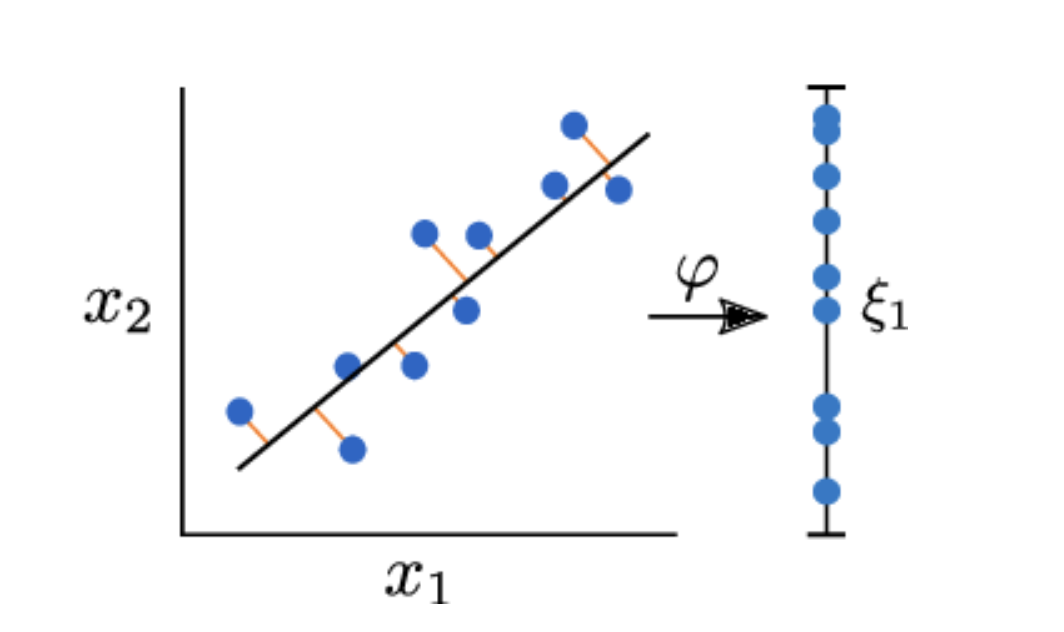

In scikit-learn, PCA is implemented as a transformer object that learns  components in its fit method, and can be used on new data to project it on these components.

In [ ]:
from sklearn.decomposition import PCA

### Iris

In [ ]:
pca = PCA(n_components=3)
pca.fit(iris_ML)

PCA(n_components=3)

In [ ]:
transformed = pca.transform(iris_ML)


In [ ]:
transformed

array([[-2.72070862e+00,  1.30572555e-01, -2.94802903e-01],
       [-2.75001086e+00,  4.16588172e-02,  1.97948235e-01],
       [-2.92289349e+00,  1.30779318e-03,  1.51553146e-01],
       [-2.78044919e+00, -1.59068802e-02,  3.24577838e-01],
       [-2.76472934e+00,  1.14198698e-01, -3.08475828e-01],
       [-2.32176240e+00,  2.53566536e-01, -7.05207418e-01],
       [-2.85491448e+00, -1.99080796e-03,  8.83928816e-02],
       [-2.66310552e+00,  1.05754572e-01, -1.40827450e-01],
       [-2.91976656e+00, -8.83527746e-02,  5.75381028e-01],
       [-2.70911083e+00,  5.98376153e-02,  1.36934912e-01],
       [-2.54576185e+00,  2.27416024e-01, -6.06232738e-01],
       [-2.64952313e+00,  6.45627318e-02, -5.24922358e-04],
       [-2.82119011e+00,  1.98130134e-02,  2.52811888e-01],
       [-3.25386071e+00, -1.24984789e-01,  4.98797396e-01],
       [-2.68294175e+00,  3.26267548e-01, -1.12878574e+00],
       [-2.42651315e+00,  3.51671230e-01, -1.29668368e+00],
       [-2.66112717e+00,  2.23153298e-01

Text(0, 0.5, 'PC2')

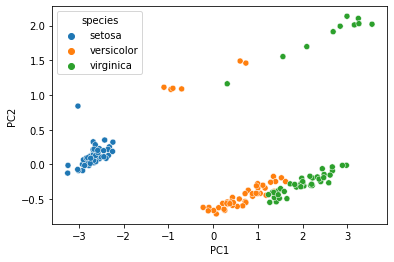

In [ ]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

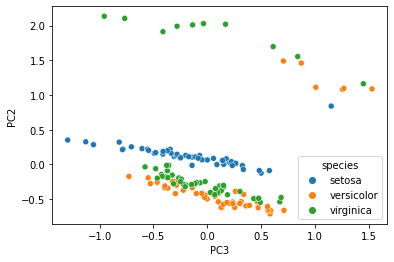

In [ ]:
sns.scatterplot(x=transformed[:,2], y=transformed[:,1], hue=iris_df['species']);
plt.xlabel('PC3')
plt.ylabel('PC2')

### Food

In [ ]:
food_ML

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0.000000,0.000007,0.000000,6.89,0.014,0.0160,0.0,0.000000,0.000000,0.000177,...,0.014,0.051,0.017,0.00017,0.000061,5.000000e-08,0.000011,0.0050,0.00008,3.000000e-07
1,0.000000,0.000004,0.000000,4.87,0.008,0.0179,0.0,0.000000,0.000000,0.000110,...,0.103,0.157,0.039,0.00042,0.000059,5.600000e-07,0.000060,0.0001,0.00003,2.000000e-07
2,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,...,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
3,0.000000,0.000007,0.000000,4.46,0.014,0.0160,0.0,0.000000,0.000000,0.000043,...,0.086,0.253,0.003,0.00038,0.000029,3.600000e-07,0.000034,0.0009,0.00008,3.000000e-07
4,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,...,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,0.000103,0.000464,0.000000,5.48,0.000,0.0074,1.6,0.000142,0.002597,0.000637,...,0.030,0.278,0.006,0.00021,0.000043,0.000000e+00,0.000104,0.0182,0.00060,8.800000e-06
7079,0.000001,0.000011,0.000000,4.81,0.000,0.0194,1.4,0.000018,0.000000,0.003678,...,0.096,0.364,0.006,0.00058,0.000001,4.000000e-08,0.000123,0.0063,0.00003,4.000000e-07
7080,0.000368,0.000994,0.000000,11.60,0.000,0.0146,2.2,0.000225,0.000458,0.000773,...,0.046,0.312,0.019,0.00028,0.000098,0.000000e+00,0.000177,0.0162,0.00024,8.900000e-06
7081,0.000000,0.000194,0.000004,17.14,0.013,0.0200,0.6,0.000112,0.007237,0.000917,...,0.033,0.190,0.845,0.00021,0.000021,4.000000e-08,0.000104,0.0025,0.00190,5.080000e-05


In [ ]:
# let's assign clusters 
model = DBSCAN(eps=2, min_samples=20)
model.fit(food_ML)


DBSCAN(eps=2, min_samples=20)

In [ ]:
food_ML['labels'] = model.labels_
food_ML['labels'].value_counts()

-1     5503
 2      845
 0      171
 9      148
 6      127
 4      105
 7       38
 1       34
 10      27
 3       26
 5       21
 11      21
 8       17
Name: labels, dtype: int64

In [ ]:
# remove outliers

food_no_outliers = food_ML[food_ML['labels'] != -1]
columns = [i for i in food_no_outliers.columns if 'labels' not in i]
food_no_outliers.reset_index(inplace=True, drop = True)

In [ ]:
# calculate the PCAs
pca = PCA(n_components=5)
pca.fit(food_no_outliers[columns])

PCA(n_components=5)

In [ ]:
food_no_outliers

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,labels
0,0.000000,0.000007,0.000000,6.89,0.014,0.0160,0.0,0.000000,0.000000,0.000177,...,0.051,0.017,0.00017,0.000061,5.000000e-08,0.000011,0.0050,0.00008,3.000000e-07,0
1,0.000000,0.000004,0.000000,4.87,0.008,0.0179,0.0,0.000000,0.000000,0.000110,...,0.157,0.039,0.00042,0.000059,5.600000e-07,0.000060,0.0001,0.00003,2.000000e-07,1
2,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,...,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07,1
3,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,...,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07,1
4,0.000000,0.000001,0.000000,5.19,0.005,0.0174,0.0,0.000000,0.000000,0.000113,...,0.159,0.039,0.00043,0.000058,6.100000e-07,0.000060,0.0000,0.00002,1.000000e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,0.000000,0.000014,0.000000,6.32,0.000,0.0074,3.2,0.000037,0.000000,0.000663,...,0.246,0.002,0.00017,0.000001,0.000000e+00,0.000081,0.0020,0.00032,3.800000e-06,2
1576,0.000068,0.000375,0.000000,7.26,0.000,0.0159,2.8,0.000633,0.000000,0.000726,...,0.220,0.006,0.00025,0.000035,0.000000e+00,0.000132,0.0108,0.00043,4.480000e-05,2
1577,0.000000,0.000117,0.000000,4.11,0.000,0.0098,1.2,0.001350,0.000000,0.000502,...,0.284,0.006,0.00036,0.000010,0.000000e+00,0.000141,0.0186,0.00015,4.400000e-06,2
1578,0.000005,0.004466,0.000001,5.38,0.000,0.0198,2.5,0.009769,0.000000,0.000699,...,0.535,0.071,0.00053,0.000372,0.000000e+00,0.000201,0.0325,0.00182,4.140000e-04,2


In [ ]:
transformed = pca.transform(food_no_outliers[columns])

In [ ]:
pca.components_

array([[-2.05486563e-06, -1.32637340e-05, -2.27104650e-07,
         9.17317395e-03,  3.22335914e-03,  2.29696815e-03,
        -1.09673772e-02, -1.25223494e-05,  4.08967756e-07,
         1.32334401e-04,  5.46605759e-01,  7.35400678e-07,
         4.81352080e-06,  7.69807030e-07, -1.07324401e-01,
         2.95493783e-06, -7.95516049e-01,  8.24988300e-02,
         4.75168526e-02,  5.55112009e-02,  2.10614815e-01,
        -2.33098350e-04,  1.33685369e-06,  2.19104910e-05,
         4.28080913e-04,  5.06238025e-03,  4.61148824e-03,
         9.30003507e-03,  4.05934352e-05, -4.65677067e-07,
         2.93377496e-08,  8.07111700e-06, -3.03746959e-04,
         1.04382033e-05, -7.03410155e-07],
       [ 2.89557297e-06, -9.44129681e-06,  4.14768741e-07,
         8.26704269e-01, -2.80387838e-03, -1.91633137e-03,
         3.53381609e-02, -2.95610970e-05,  1.46086912e-05,
        -8.35260546e-05, -4.10224168e-01, -7.72926923e-07,
        -5.31214936e-06, -4.84746173e-07,  1.77657496e-01,
         2.08

In [ ]:
PCs= ["PC"+ str(i) for i in range(5)]
transf = pd.DataFrame(transformed, columns = PCs)
transf['labels'] = food_no_outliers['labels'] 

In [ ]:
transf['labels'].value_counts(
    
)

2     845
0     171
9     148
6     127
4     105
7      38
1      34
10     27
3      26
5      21
11     21
8      17
Name: labels, dtype: int64

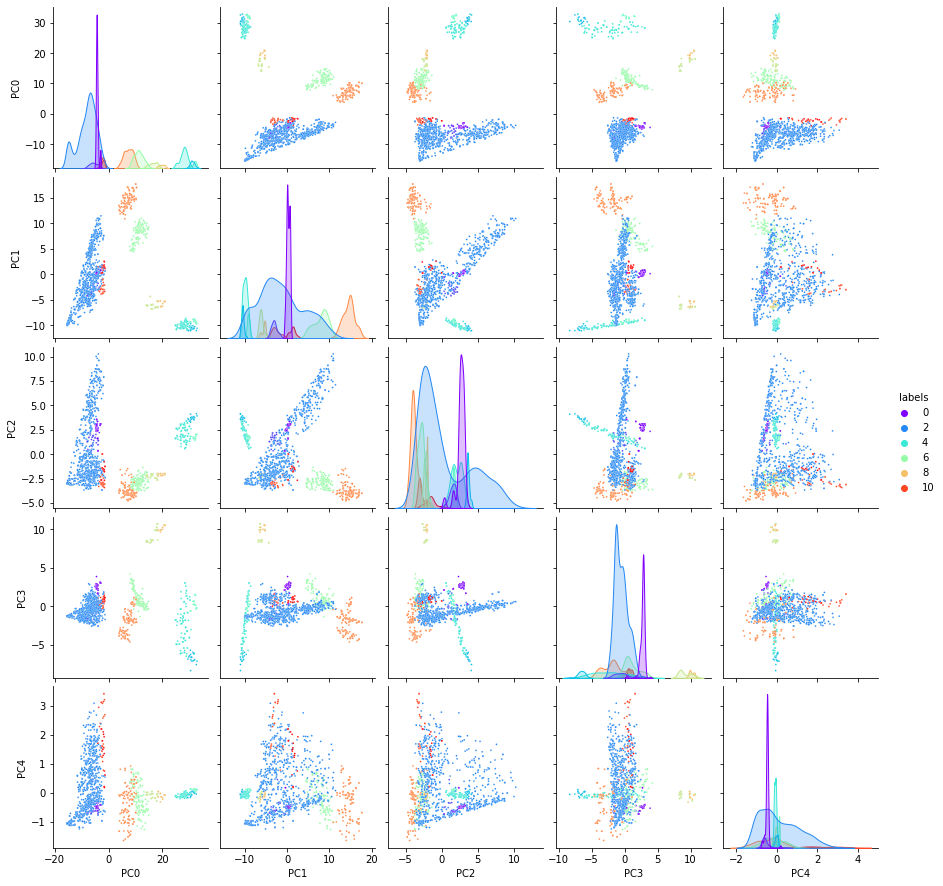

In [ ]:
# plot all the principal components, and represent the samples based on the identified clusters

sns.pairplot(data = transf, plot_kws={"s": 3}, palette = 'rainbow', hue = 'labels')


## Manifold learning

Principal Component Analysis (PCA) chooses an “interesting” linear projection of the data, but often miss important non-linear structure in the data.

Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. Though supervised variants exist, the typical manifold learning problem is unsupervised: it learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications.

### t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE (TSNE) converts affinities of data points to probabilities. t-SNE is particularly sensitive to local structure and has a few other advantages over existing techniques:

* Revealing the structure at many scales on a single map

* Revealing data that lie in multiple, different, manifolds or clusters

* Reducing the tendency to crowd points together at the center

t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples

A feature of t-SNE is a tuneable parameter, **“perplexity”**, which says (loosely) how to balance attention between local and global aspects of the data. Larger perplexities lead to more nearest neighbors and less sensitive to small structure. 

The t-SNE algorithm doesn’t always produce similar output on successive runs, for example, and there are additional hyperparameters related to the optimization process.

Axes do not have any unit of measure and do not really mean anything!





[How to use t-SNE effectively](https://distill.pub/2016/misread-tsne/)

### Iris dataset

In [ ]:
import sklearn as skl


twodproj = skl.manifold.TSNE(n_components=2).fit_transform(iris_ML)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


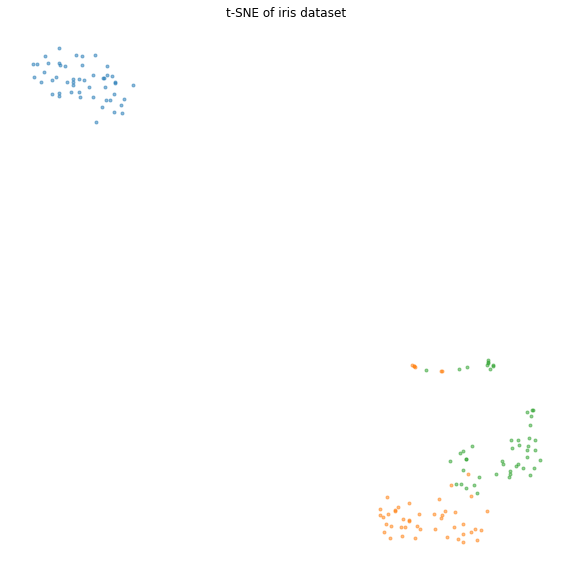

In [ ]:
twodproj = pd.DataFrame(twodproj)
twodproj['label'] = iris_df['species']
plt.figure(figsize  = (10,10))
for i in twodproj['label'].unique():
  data = twodproj[twodproj['label'] == i]
  plt.plot(data[0], data[1], '.', label = i, alpha=0.5)
plt.title('t-SNE of iris dataset')
plt.axis('off');

### Genes dataset

In [ ]:
# This dataset (kidpack genes) contains gene expression profiles of renal cell cancer samples.
# more info here: https://www.bioconductor.org/packages/devel/data/experiment/manuals/kidpack/man/kidpack.pdf
# Samples (columns of the expression matrix) correspondto renal cell cancer samples from 87 patients with kidney tumors.  
# Probes (rows of the expression matrix) correspond to different cDNA clones.# 

# the goal is to visualize the dataset and cluster genes based on expression levels

genes = pd.read_csv("https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week7/genes.csv")
genes = genes.drop(columns = ['Unnamed: 0'])
genes

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,-0.314408,0.131512,-0.049018,-0.674385,-0.289890,0.258422,-0.120400,-0.060359,0.706799,-0.326422,...,0.379001,0.009101,-0.182293,-0.270911,-0.434925,-0.031925,1.402160,0.502573,-0.061042,-0.206210
4220,-0.313823,-0.041095,-0.049798,-0.492502,-0.223146,0.172682,-0.164426,0.033539,0.420965,-0.180468,...,0.086748,0.198886,-0.167620,-0.336774,0.022460,-0.211773,0.379261,0.465487,0.024584,-0.264364
4221,-0.091283,0.118607,-0.088939,-0.349571,-0.107676,0.019609,0.187555,0.214635,0.210662,-0.127357,...,-0.121660,0.004138,-0.170726,-0.129437,-0.379607,0.007242,0.258818,0.284263,-0.008146,-0.047151
4222,-0.552395,0.125635,-0.290230,-1.283253,-0.870161,-0.131500,0.100046,0.153907,0.582813,-0.273445,...,0.219980,-0.503742,-0.727327,-0.477732,-0.523019,-0.382573,0.830773,0.246017,-0.002329,0.100187


In [ ]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,...,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,...,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,...,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,...,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,...,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.210836
50%,-0.069031,-0.016486,-0.014913,-0.046870,-0.018104,0.021162,-0.072925,-0.018363,-0.066373,-0.008910,...,-0.026565,-0.042374,-0.010210,-0.015849,-0.001221,-0.024906,-0.006854,-0.021976,-0.095412,-0.016940
75%,0.235924,0.178946,0.167848,0.376756,0.217731,0.208004,0.168238,0.182520,0.205242,0.195324,...,0.241220,0.200383,0.160373,0.195828,0.226961,0.195206,0.243014,0.237617,0.208726,0.189075
max,2.403599,1.609597,2.357123,1.987768,2.278563,2.106546,1.957411,1.807777,2.719371,3.194689,...,3.058383,1.960692,1.940195,1.352897,2.451836,1.733719,2.586922,3.230761,1.583828,1.694063


In [ ]:
genes_ML = preprocessing.scale(genes, axis=0)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


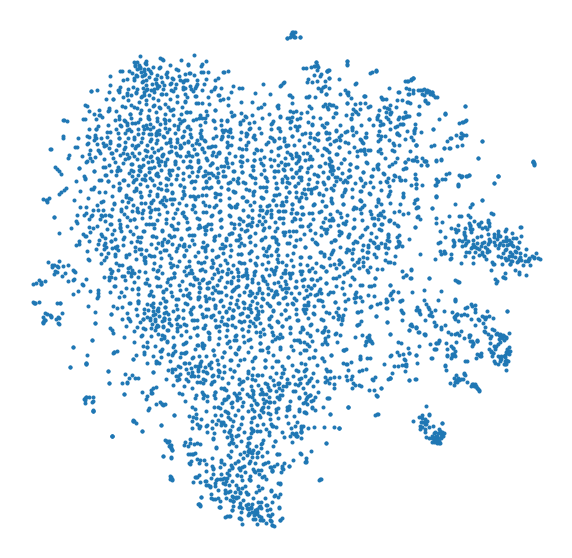

In [ ]:
import sklearn
# use TSNE to make a projection of the data on an optimal 2D plane using 
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


twodproj = sklearn.manifold.TSNE(n_components=2).fit_transform(genes_ML)
plt.figure(figsize  = (10,10))
plt.plot(twodproj[:,0], twodproj[:,1], '.')
plt.axis('off');

2-dimensional projection of the "kidpack" genes. This 2D projection is generates with the TSNE algorithm with default sklearn parameters corresponding to 30 nearest-neighbours and a Eucledian distance metric in the 87 dimensional parameter space. Note that TSNE plots are an exception to the rule that axis always need to be labelled! the TSNE projections are unitless and do not have any physical meaning.

In [ ]:
# apply the model
model = DBSCAN(eps=5, min_samples=10)


model.fit(genes_ML)

DBSCAN(eps=5, min_samples=10)

In [ ]:
# check how many labels

np.unique(model.labels_)

array([-1,  0,  1,  2,  3])

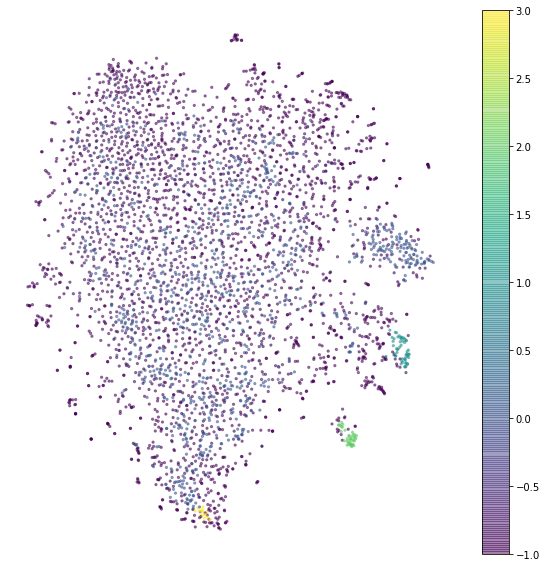

In [ ]:
# visualize the labels in dataset

plt.figure(figsize  = (10,10))
plt.scatter(twodproj[:,0], twodproj[:,1], c=model.labels_, alpha=0.5,s=5)
plt.axis('off')
# plt.legend()
plt.colorbar();

In [ ]:
# there are several outliers
100* np.count_nonzero(model.labels_ == -1) / len(model.labels_)

68.01609848484848

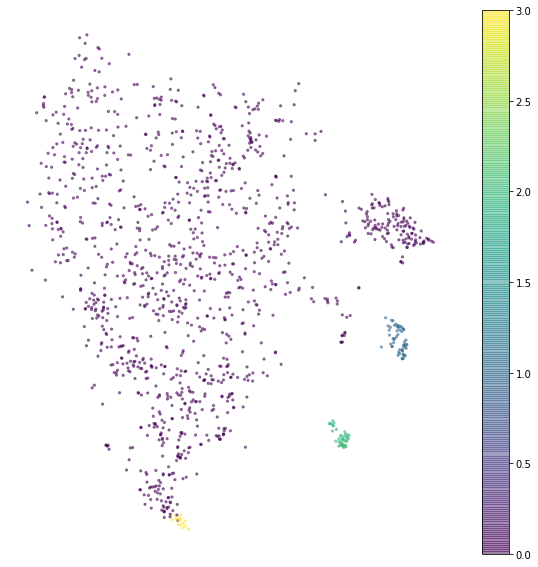

In [ ]:
# remove the outliers
mask = model.labels_ !=-1

plt.figure(figsize  = (10,10))
plt.scatter(twodproj[mask][:,0], twodproj[mask][:,1], c=model.labels_[mask], alpha=0.5,s=5)
plt.axis('off')
# plt.legend()
plt.colorbar();

This hyperparameter selection leads to the identification of ~60% of the points as "outliers". This fraction is too high and cannot be generally justified unless there is a strong contextual motivation for it. A better set of hyperparameters should be chosen



### Exercise

Play around with perplexity in the food dataset